In [41]:
# factor research
import pandas as pd
import warnings
import numpy as np
import streamlit as st
warnings.filterwarnings("ignore")

# 1. 读取数据库数据

## Note: 通常来说读取因子数据与价格数据就行，如果要做市值中性化处理需要再读取市值因子

In [2]:
# 从HDF5文件读取数据并转换为DataFrame对象
price = pd.read_hdf('/Users/syesw/Desktop/Easy_Alpha_Research/quant_factor_research/data/20170103-20180103-price.h5', key='price')
EPS_factor = pd.read_hdf('/Users/syesw/Desktop/Easy_Alpha_Research/quant_factor_research/data/20170103-20180103-EPS-factor.h5', key='price')
Marketcap_factor = pd.read_hdf('/Users/syesw/Desktop/Easy_Alpha_Research/quant_factor_research/data/20170103-20180103-marketcap-factor.h5', key='price')

print(type(price))
print(type(EPS_factor))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [3]:
price

order_book_id,600000.XSHG,600004.XSHG,600005.XSHG,600006.XSHG,600007.XSHG,600008.XSHG,600009.XSHG,600010.XSHG,600011.XSHG,600012.XSHG,...,603986.XSHG,603987.XSHG,603988.XSHG,603989.XSHG,603990.XSHG,603993.XSHG,603996.XSHG,603997.XSHG,603998.XSHG,603999.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,9.7208,9.2767,3.42,6.4453,14.4675,3.2538,25.6115,1.9979,6.1343,12.0810,...,31.5937,14.6285,21.0273,25.6453,17.6756,3.4143,20.0091,11.6995,16.1732,14.3934
2017-01-04,9.7387,9.3416,3.46,6.6129,14.6667,3.2774,25.7461,1.9979,6.1516,12.1843,...,31.5937,14.4791,23.1312,25.7279,17.7364,3.4598,20.3547,11.8182,16.2003,14.6185
2017-01-05,9.7208,9.3156,3.48,6.6222,14.4592,3.2696,25.7845,2.0049,6.1170,12.5162,...,31.5937,14.0174,22.9568,25.0537,17.8485,3.4598,20.6412,11.7766,16.0018,14.4413
2017-01-06,9.6492,9.3156,3.53,6.6967,14.6999,3.2931,25.8518,2.0049,6.1343,12.6711,...,31.5937,13.1556,22.3806,24.7442,16.9716,3.4325,20.6016,11.6402,15.8485,14.5658
2017-01-09,9.6612,9.3935,3.56,6.6874,14.7082,3.3089,25.8422,2.0120,6.1690,12.5678,...,31.5937,13.0984,23.8788,24.8680,16.9332,3.4507,20.6313,11.6758,15.9657,15.0688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,9.9121,13.6606,NaN,5.5355,14.3851,4.0622,42.9066,2.3932,5.6445,8.0961,...,58.0728,8.0160,22.2072,26.4052,11.3670,6.0194,19.2861,10.1425,10.1287,7.4288
2017-12-28,9.8493,13.9580,NaN,5.4793,14.4272,4.0781,42.8774,2.4326,5.5815,8.1712,...,58.0728,8.2483,22.6337,26.5810,11.3896,6.4323,19.0767,10.1785,10.1919,7.4288
2017-12-29,9.8886,14.1019,NaN,5.4793,14.4357,4.0860,43.7721,2.4228,5.5545,8.2614,...,58.0728,8.0824,22.5360,27.0242,11.5375,6.3130,18.3687,10.1335,10.1016,7.3999


In [4]:
EPS_factor

basic_earnings_per_share
date       asset                                
2017-01-03 600000.XSHG                    1.8730
           600004.XSHG                    0.9200
           600005.XSHG                    0.0370
           600006.XSHG                    0.1136
           600007.XSHG                    0.5400
...                                          ...
2018-01-03 603993.XSHG                    0.0900
           603996.XSHG                    0.2333
           603997.XSHG                    0.3500
           603998.XSHG                    0.1700
           603999.XSHG                    0.0920

[285798 rows x 1 columns]

In [5]:
# Marketcap格式需要处理一下，因为它与EPS_factor列数不一致
Marketcap_factor = Marketcap_factor.reset_index().rename(columns={'order_book_id': 'asset'})
Marketcap_factor = Marketcap_factor.sort_values(['date', 'asset'])
Marketcap_factor = Marketcap_factor.set_index(['date', 'asset']).dropna()
Marketcap_factor

market_cap
date       asset                    
2017-01-03 600000.XSHG  3.523780e+11
           600004.XSHG  1.643387e+10
           600005.XSHG  3.452073e+10
           600006.XSHG  1.384000e+10
           600007.XSHG  1.755693e+10
...                              ...
2018-01-03 603993.XSHG  1.522746e+11
           603996.XSHG  5.489744e+09
           603997.XSHG  7.163100e+09
           603998.XSHG  4.826488e+09
           603999.XSHG  4.498560e+09

[285877 rows x 1 columns]

# 2. 数据预处理

## 我主要对因子做去极值、中性化以及标准化三种处理

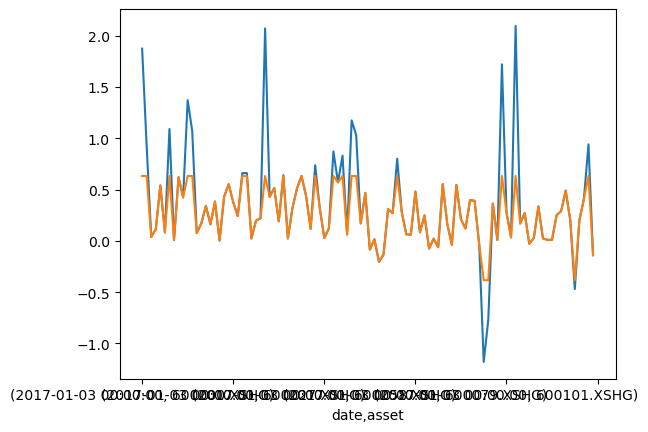

In [6]:
# 对特征值进行中位数绝对偏差去极值
from utils.tool import mad
from utils.tool import market_cap_neutralize
from utils.tool import stand

EPS_factor['basic_earnings_per_share'][:100].plot()
EPS_factor['basic_earnings_per_share'] = mad(EPS_factor['basic_earnings_per_share'])
EPS_factor['basic_earnings_per_share'][:100].plot()
Marketcap_factor['market_cap'] = mad(Marketcap_factor['market_cap'])

In [7]:
# 处理下两者的列数
# 使得列数匹配较小的那个dataframe
merged_df = pd.merge(Marketcap_factor, EPS_factor, left_index=True, right_index=True, how='inner')

In [8]:
merged_df

market_cap  basic_earnings_per_share
date       asset                                              
2017-01-03 600000.XSHG  3.109500e+10                  0.632139
           600004.XSHG  1.643387e+10                  0.632139
           600005.XSHG  3.109500e+10                  0.037000
           600006.XSHG  1.384000e+10                  0.113600
           600007.XSHG  1.755693e+10                  0.540000
...                              ...                       ...
2018-01-03 603993.XSHG  3.109500e+10                  0.090000
           603996.XSHG  5.489744e+09                  0.233300
           603997.XSHG  7.163100e+09                  0.350000
           603998.XSHG  4.826488e+09                  0.170000
           603999.XSHG  4.498560e+09                  0.092000

[285798 rows x 2 columns]

In [9]:
# 进行市值中性化处理
EPS_facor_after_neutralize = market_cap_neutralize(merged_df, 'market_cap', 'basic_earnings_per_share').drop(columns=['market_cap','basic_earnings_per_share'])

<Axes: xlabel='date,asset'>

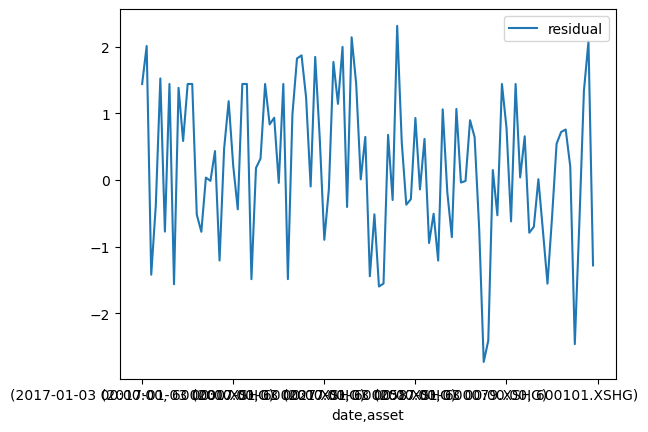

In [11]:
# 进行标准化处理
EPS_facor_after_neutralize_and_std = stand(EPS_facor_after_neutralize)
EPS_facor_after_neutralize_and_std[:100].plot()

# 3. 因子有效性分析

## 这里主要使用alphalens库对因子进行分析，该库已经停止维护了，我只能自己修改了一版本。


In [17]:
# 需要注意旧版Alphalens已经不再支持新版本pandas了
from new_alphalens import performance
from new_alphalens import plotting
from new_alphalens import tears
from new_alphalens import utils

## 3.1 因子的IC分析

In [18]:
# 计算因子收益
factor_return = utils.get_clean_factor_and_forward_returns(EPS_facor_after_neutralize_and_std, price)

Dropped 4.1% entries from factor data: 4.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [19]:
factor_return

1D        5D       10D    factor  \
date       asset                                                 
2017-01-03 600000.XSHG  0.001841 -0.006748  0.006131  1.443025   
           600004.XSHG  0.006996  0.011890 -0.025192  2.013299   
           600005.XSHG  0.011696  0.061404  0.067251 -1.421401   
           600006.XSHG  0.026003  0.028889 -0.023133 -0.381554   
           600007.XSHG  0.013769  0.028111  0.044749  1.526148   
...                          ...       ...       ...       ...   
2017-12-19 603993.XSHG -0.025877 -0.022841  0.073052 -1.166310   
           603996.XSHG  0.000537  0.006426 -0.020877  0.514814   
           603997.XSHG -0.000860 -0.015459 -0.023189  1.009344   
           603998.XSHG  0.003564  0.000000 -0.001777  0.240165   
           603999.XSHG -0.017196 -0.015877  0.033073 -0.116560   

                        factor_quantile  
date       asset                         
2017-01-03 600000.XSHG                5  
           600004.XSHG                5  
           600005.XSHG                1  
           600006.XSHG                2  
           600007.XSHG                5  
...                                 ...  
2017-12-19 603993.XSHG                1  
           603996.XSHG                3  
           603997.XSHG                4  
           603998.XSHG                3  
           603999.XSHG                2  

[274178 rows x 5 columns]

In [20]:
IC = performance.factor_information_coefficient(factor_return)

In [21]:
IC

,1D,5D,10D
date,,,
2017-01-03,-0.039953,-0.214781,-0.031942
2017-01-04,-0.205233,-0.204059,-0.047422
2017-01-05,-0.173313,-0.137300,0.000577
2017-01-06,-0.073898,-0.050056,0.048555
2017-01-09,0.009276,0.048566,0.058181
...,...,...,...
2017-12-13,-0.050570,0.038434,0.087275
2017-12-14,-0.088307,0.136197,0.117882
2017-12-15,0.047880,0.152895,0.162224


array([<Axes: title={'center': '1D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>,
       <Axes: title={'center': '5D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>,
       <Axes: title={'center': '10D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>],
      dtype=object)

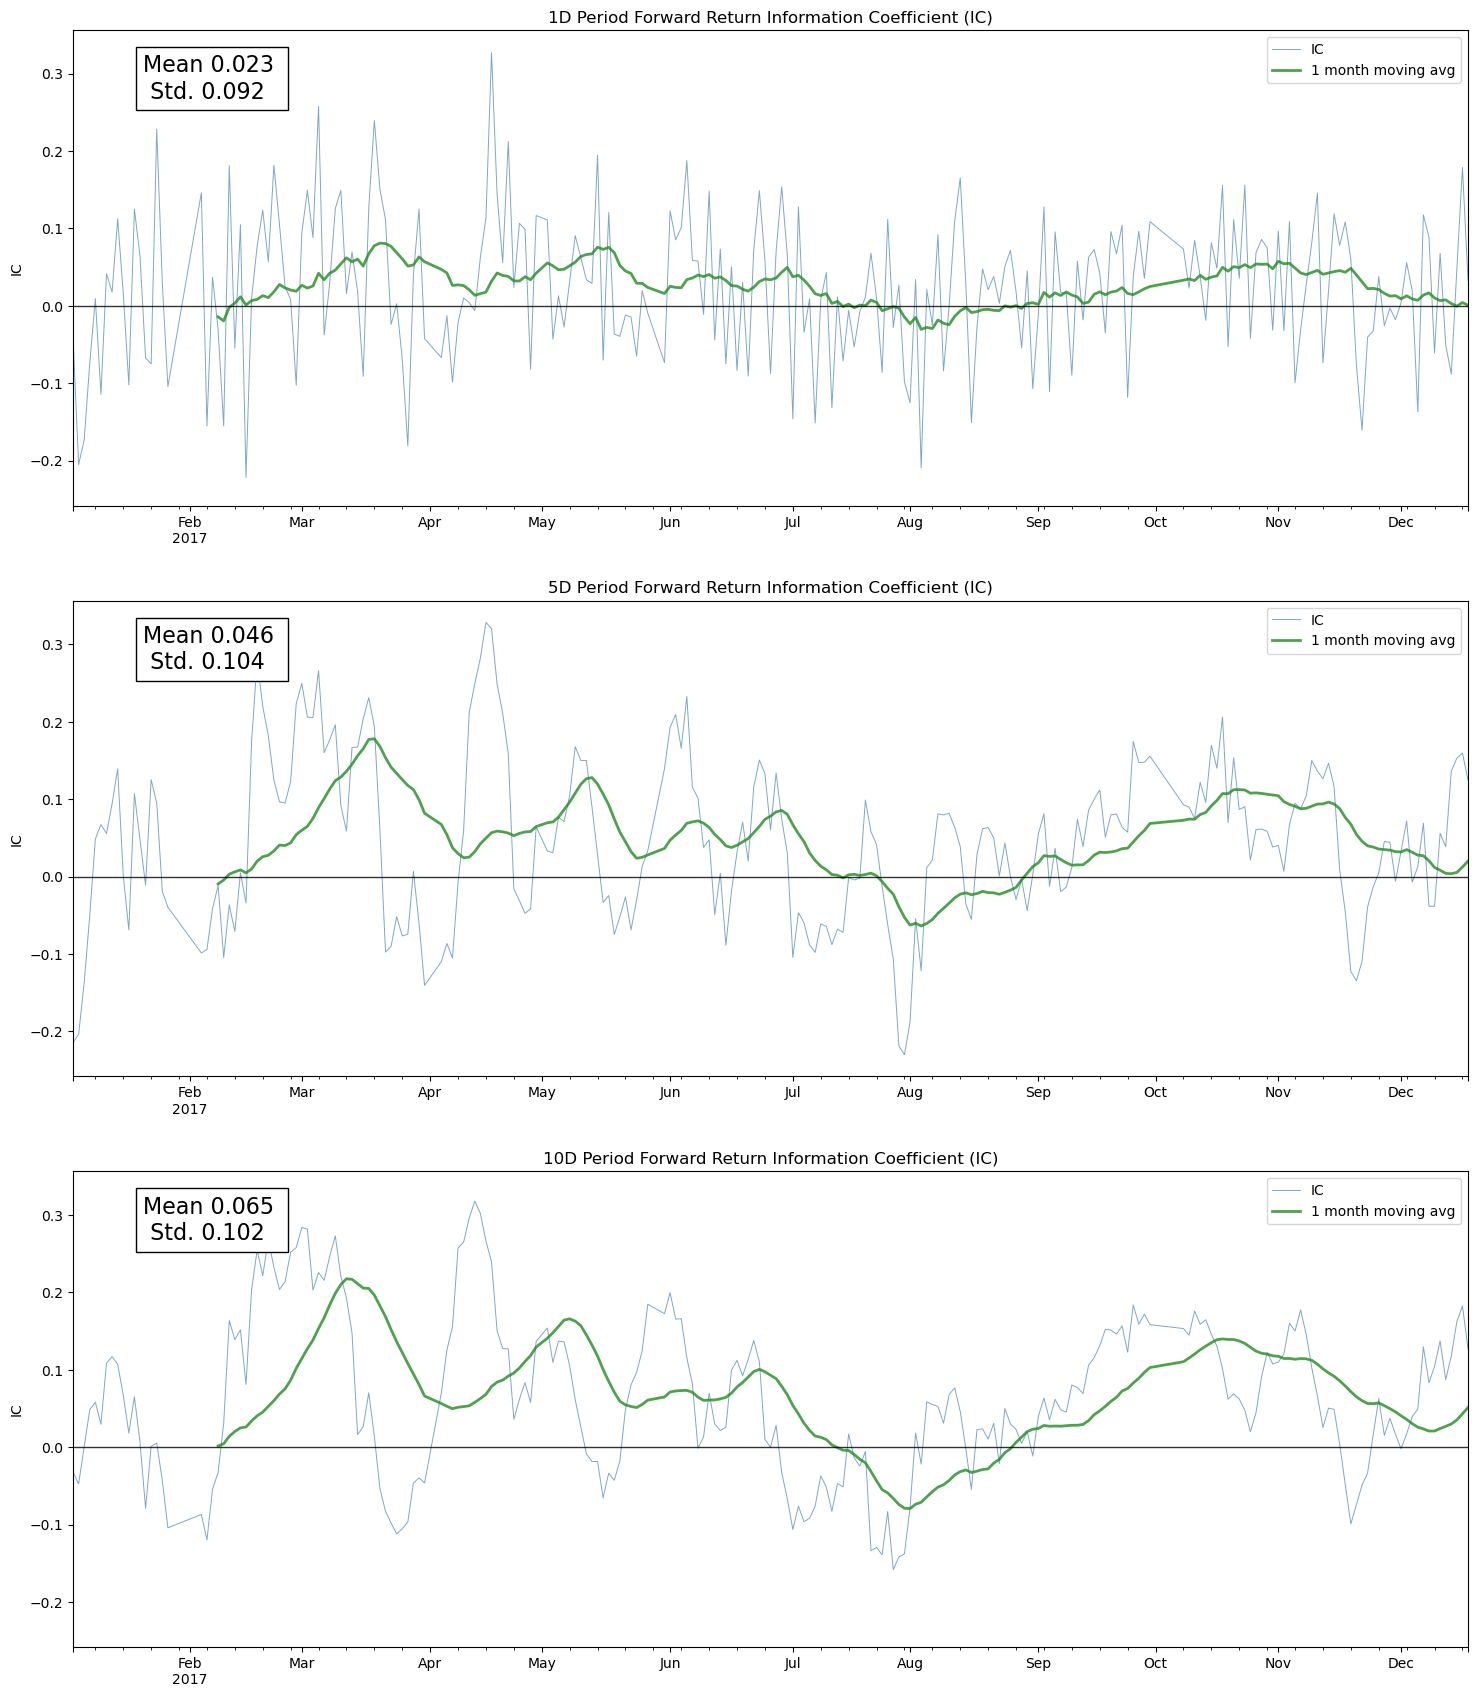

In [22]:
# 因子IC序列图
plotting.plot_ic_ts(IC)

array([<Axes: title={'center': '1D Period IC'}, xlabel='IC', ylabel='Count'>,
       <Axes: title={'center': '5D Period IC'}, xlabel='IC', ylabel='Count'>,
       <Axes: title={'center': '10D Period IC'}, xlabel='IC', ylabel='Count'>],
      dtype=object)

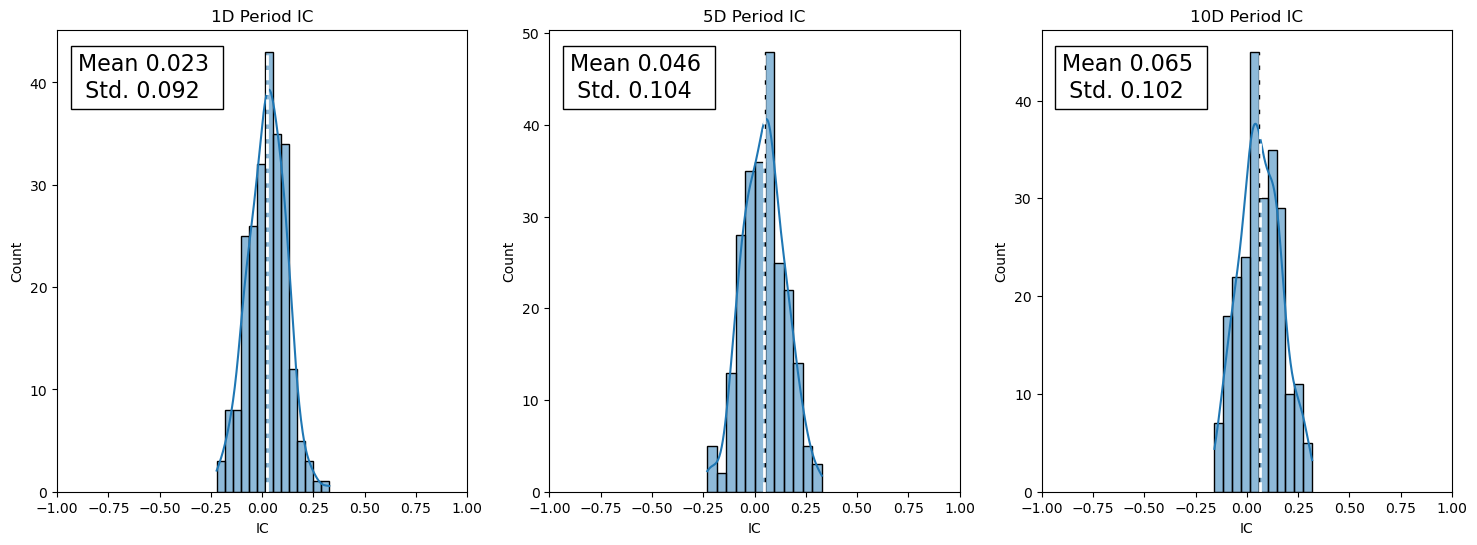

In [23]:
# 因子IC分布图
plotting.plot_ic_hist(IC)

In [40]:
# 一些统计数据
# 因子平均收益（注意是因子的收益不是股票的远期收益）
factor_mean_return = performance.factor_returns(factor_return).iloc[:,0].mean()

# mean and std
IC_mean = IC.iloc[:, 0].mean()
IC_std = IC.iloc[:, 0].std()

# IC > 0.02的概率
a = IC.iloc[:, 0]
percent = len(a[a>0.02])/len(a)

# IR信息比率
IR = IC_mean/IC_std

print("Factor mean return", factor_mean_return)
print("IC Mean:", IC_mean)
print("IC Std:", IC_std)
print("IC > 0.02:", percent)
print("IR:", IR)


Factor mean return 0.0004350530772308502
IC Mean: 0.023111128318263667
IC Std: 0.09167807732000667
IC > 0.02: 0.5254237288135594
IR: 0.25209001970659983


In [48]:
'''
# 保存数据以便用于可视化
data = pd.DataFrame({
    'factor_mean_return': [factor_mean_return],
    'IC_mean': [IC_mean],
    'IC_std': [IC_std],
    'IC_percent': [percent],
    'IR': [IR]
})

# data.to_hdf('statistics.h5', key='data', mode='w')
'''

## 3.2 因子的收益率分析

Returns Analysis


,1D,5D,10D
Ann. alpha,0.114,0.101,0.101
beta,-0.009,-0.051,-0.067
Mean Period Wise Return Top Quantile (bps),4.911,4.573,4.491
Mean Period Wise Return Bottom Quantile (bps),-2.075,-1.876,-2.063
Mean Period Wise Spread (bps),6.986,6.432,6.533


<Figure size 640x480 with 0 Axes>

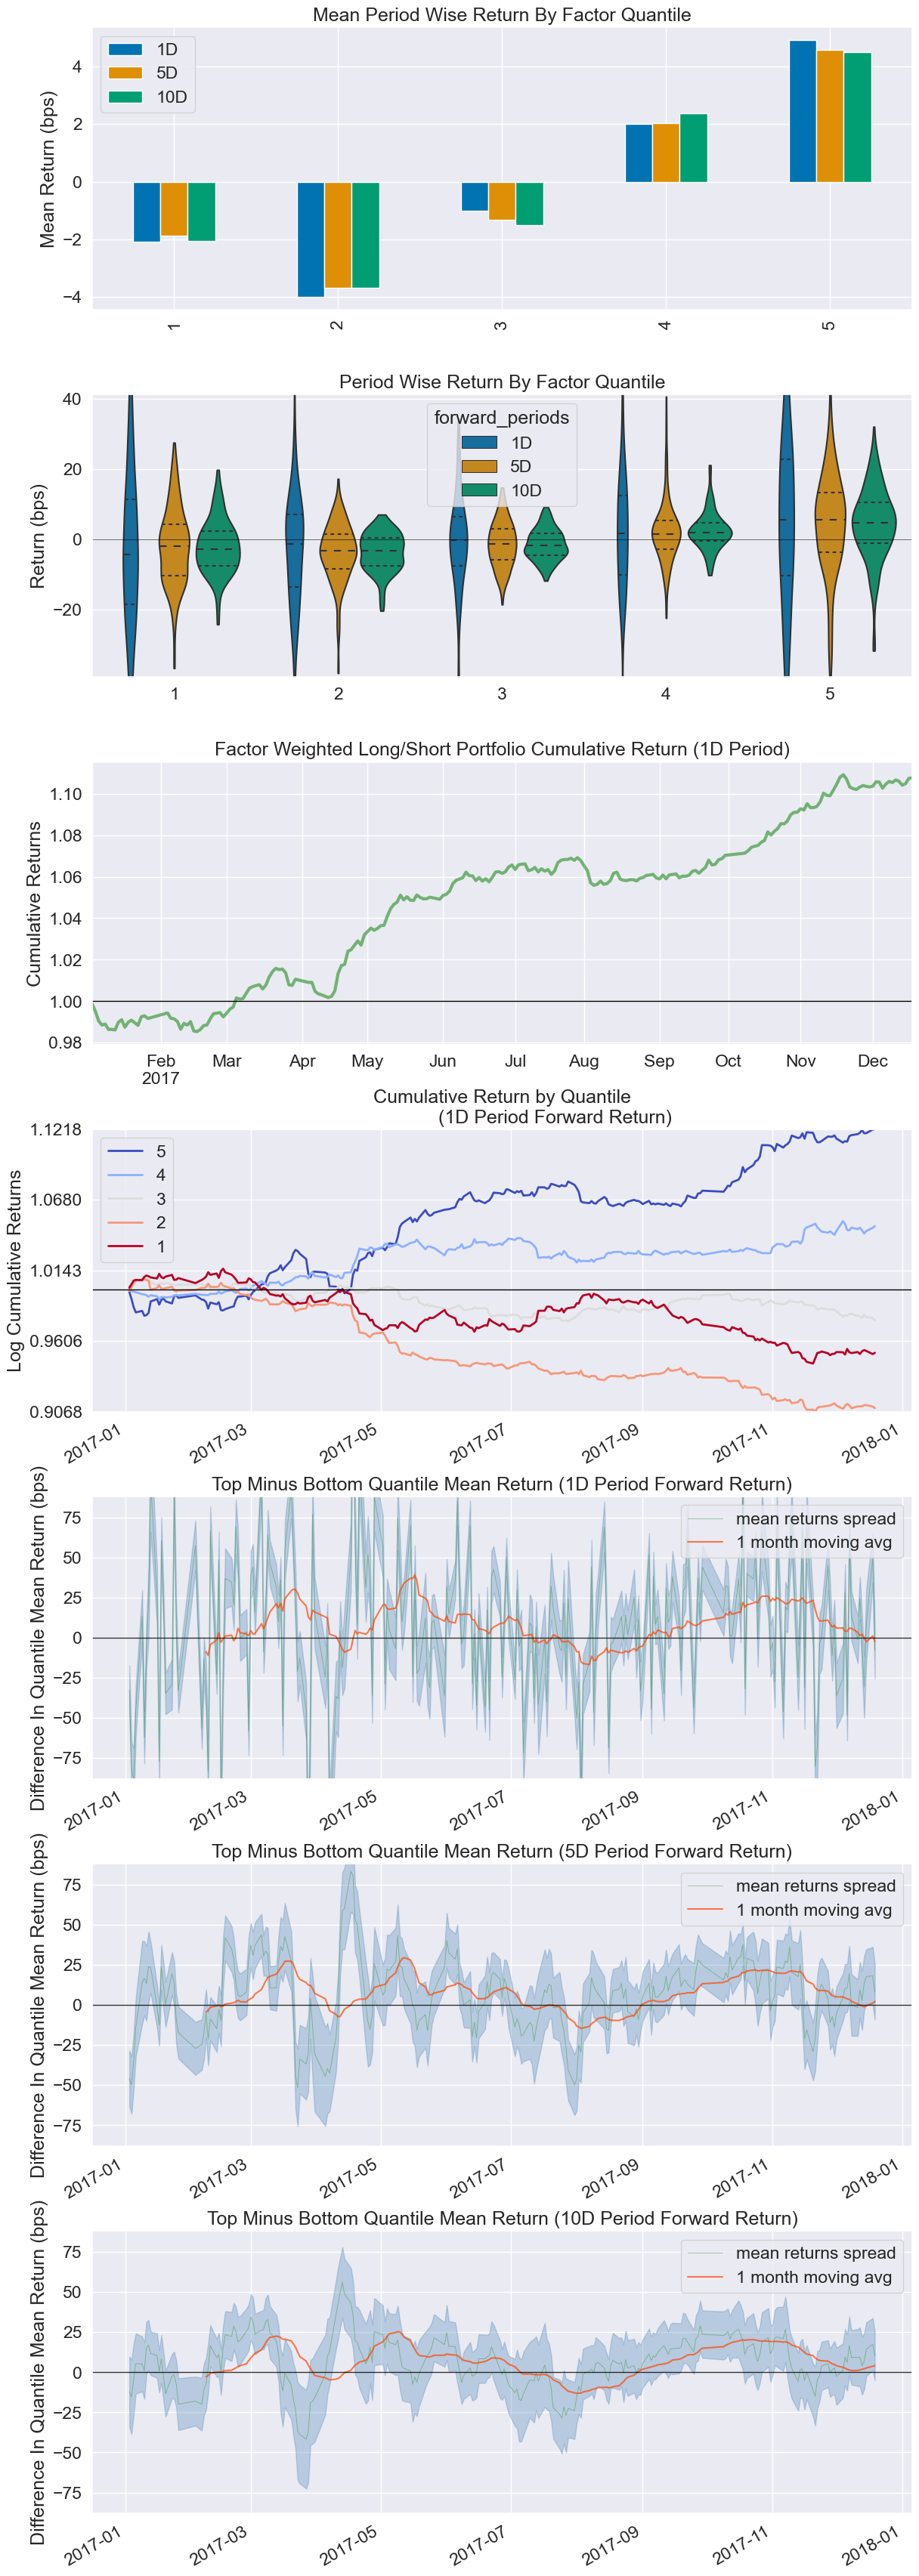

In [39]:
tears.create_returns_tear_sheet(factor_return)

## 4. Openai给出建议

In [ ]:
import h5py
import numpy as np
import openai_secret_manager
import openai

def evaluate_factor_from_hdf5(file_path):
    # 从HDF5文件中读取统计数据
    with h5py.File(file_path, 'r') as f:
        factor_mean_return = f['factor_mean_return'][()]
        ic_mean = f['ic_mean'][()]
        ic_std = f['ic_std'][()]
        ic_threshold = f['ic_threshold'][()]

    # 使用OpenAI接口对因子进行评估
    api_key = openai_secret_manager.get_secret("openai_api_key")
    openai.api_key = api_key

    prompt = f"根据统计数据评估因子：\n因子平均收益率：{factor_mean_return}\nIC均值：{ic_mean}\nIC标准差：{ic_std}\nIC阈值：{ic_threshold}\n请给出对该因子的评估结果。"
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=100,
        n=1,
        stop=None,
        temperature=0.5
    )

    # 从OpenAI接口的响应中提取评估结果
    evaluation_result = response.choices[0].text.strip()

    return evaluation_result
